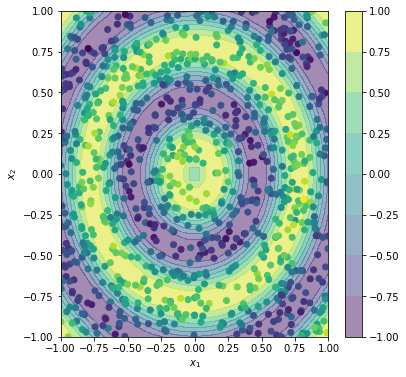

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def circles(X):
    y = np.sin(10*np.sqrt(X[:,0] ** 2 + X[:,1] ** 2))
    return y

def generate_data(y_func,N=1000):
    X = 2*np.random.rand(N,2)-1
    y = y_func(X) + 0.25* np.random.randn(N)
    return X,y

def draw_contours(y_func):
    plt.figure(figsize=(6,6))
    X1,X2 = np.meshgrid(np.linspace(-1, 1, 30),np.linspace(-1, 1, 30))
    Y = y_func(np.c_[X1.ravel(),X2.ravel()]).reshape(X1.shape)
    plt.contourf(X1,X2,Y,alpha=0.5)
    c = plt.colorbar()
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    return None

X,y = generate_data(circles)
f = draw_contours(circles)
s = plt.scatter(X[:,0],X[:,1],c=y) 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

29/29 [==============================] - 0s 911us/step
CPU times: user 7.55 s, sys: 763 ms, total: 8.31 s
Wall time: 5.09 s


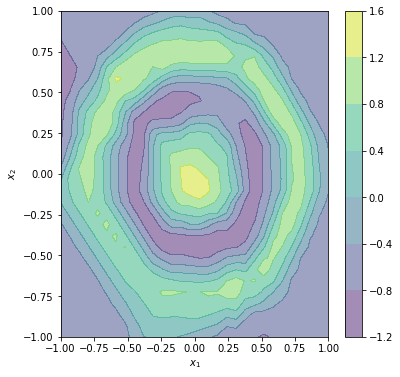

In [6]:
%%time
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='softmax'))
# model.add(Dense(10, activation='softmax'))
# model.add(Dense(10, activation='softmax'))
# model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=256, batch_size=64,verbose=False)

f = draw_contours(model.predict)